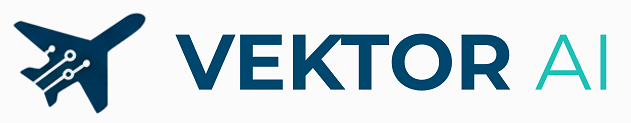

El notebook contiene modelo que será el final usado en el producto mínimo viable (MVP), contiene variables climáticas para mejorar en rendimiento del modelo. El modelo corresponde a un Random Forest con los mismos hiperparámetros que el primer modelo para el MVP (n_estimators': 98, 'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 10, 'class_weight': 'balanced', 'n_jobs': -1, 'random_state': 42). Superó los resultados de todos los modelos obtenidos con GridSearch y por eso fue seleccionado.

Se obtiene un Accuracy de 0.793 y un ROC AUC de 0.835. El reporte de clasificación es el siguiente:

||Precisión|Recall|F1-score|Support|
|------|------|------|-------|--------|
|0.0|0.91|0.82|0.86| 1644099|
|1.0|0.49|0.68|0.57|420496|
|accuracy|||0.79|2074595|
|macro avg|0.70|0.75|0.72|2074595|
|weighted avg|0.83|0.79|0.80|2074595|

Las cinco variables más importantes: ```CRS_DEP_TIME```, ```CRS_ARR_TIME```, ```humedad```, ```temperatura```, ```presión```

El modelo fue optimizado no solo para predecir retrasos, sino para generar probabilidades confiables que puedan utilizarse directamente en decisiones operativas. Se analizó la relación entre probabilidades predichas y retrasos reales, asegurando que una probabilidad alta represente efectivamente un mayor riesgo histórico.

Se validó que el modelo no presenta sesgos hacia aerolíneas específicas. Las tasas reales de retraso varían considerablemente entre aerolíneas (desde menos del 1% hasta cerca del 26%), y el modelo reproduce estas diferencias de forma proporcional, sin penalizar artificialmente a ninguna compañía.

Este enfoque permite utilizar el modelo como una herramienta confiable y justa para anticipar retrasos, apoyar decisiones operativas y mejorar la planificación de recursos.

## **0. Descripción de las Variables**

**Time Period:**

1. **QUARTER:** Quarter(1-4)

2. **MONTH:** Month

3. **DAY_OF_MONTH:** Day of the Month

4. **FL_DATE:** Flight Date (yyymmdd)

**Airline**

5. **OP_UNIQUE_CARRIER:** Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.

6. **TAIL_NUM:** Tail Number

**Origin**

7. **ORIGIN_AIRPORT_ID:** Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.

8. **ORIGIN:** 	Origin Airport

**Destination**

9. **DEST_AIRPORT_ID:** Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.

10. **DEST:**	Destination Airport

**Departure Performance**

11. **CRS_DEP_TIME:**	CRS Departure Time (local time: hhmm)

12. **DEP_DEL15:**	Departure Delay Indicator, 15 Minutes or More (1=Yes)

**Arrival Performance**

13. **CRS_ARR_TIME:**	CRS Arrival Time (local time: hhmm)

**Weather Variables**

14. **temperatura**: Representa la temperatura ambiente registrada en el aeropuerto de origen durante el día del vuelo. La temperatura puede influir en el rendimiento de las aeronaves y en la operatividad aeroportuaria.

15. **humedad**: Indica el nivel de humedad relativa del aire. Valores elevados pueden asociarse a condiciones de baja visibilidad y mayor probabilidad de fenómenos meteorológicos adversos.

16. **presion**: Corresponde a la presión atmosférica registrada. Cambios en la presión suelen estar relacionados con sistemas meteorológicos inestables que pueden afectar la operación aérea.

17. **visibilidad**: Mide la distancia máxima a la que pueden distinguirse objetos en condiciones normales. Una visibilidad reducida puede provocar demoras por restricciones operativas y de seguridad.

18. **viento_velocidad**: Indica la velocidad del viento en superficie. Vientos fuertes pueden generar retrasos debido a limitaciones en despegues y aterrizajes.

19. **condición**: Variable categórica que describe el estado general del clima mediante códigos meteorológicos. Entre los principales códigos se incluyen:
    * CLR: cielo despejado
    * RA: lluvia
    * SN: nieve
    * FG: niebla
    * TS: tormenta eléctrica
   
  * Estos códigos permiten identificar de forma compacta las condiciones climáticas predominantes durante la operación del vuelo.

# Integración de datos climáticos al dataset de vuelos

## 1. Objetivo del uso de la variable clima en la predicción

Las variables climáticas se integran al dataset con el fin de modelar factores externos que afectan el desempeño operativo de los vuelos. Condiciones meteorológicas adversas pueden generar demoras en despegues, congestión en pista y ajustes en la planificación aeroportuaria, por lo que su inclusión permite mejorar la capacidad predictiva del modelo.

## 2. Fuentes de datos externas y normalización geoespacial

La base de datos de vuelos no cuenta con un identificador directo que permita su vinculación con información climática. Por este motivo, fue necesario incorporar fuentes de datos adicionales que permitieran establecer una relación espacial entre vuelos y condiciones meteorológicas.

Se utilizaron dos datasets externos:
- Un dataset de estaciones meteorológicas con sus respectivas coordenadas geográficas (latitud y longitud). [Fuente de descarga](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwin1fTL1viRAxUBQzABHbosArgQFnoECAwQAQ&url=https%3A%2F%2Fwww.ncei.noaa.gov%2Fpub%2Fdata%2Fnoaa%2Fisd-history.csv&usg=AOvVaw3K8oxIQwTSdqoixdzTGvA3&opi=89978449)
- Un dataset de aeropuertos que incluye la ubicación geográfica de cada aeropuerto. [Fuente de descarga](https://davidmegginson.github.io/ourairports-data/airports.csv)

Ambas fuentes fueron normalizadas a un mismo esquema geoespacial basado en coordenadas de latitud y longitud, permitiendo su comparación espacial y posterior integración.


## 3. Asignación de estaciones meteorológicas a aeropuertos

Una vez normalizadas las fuentes geoespaciales, se calculó la distancia geográfica entre cada aeropuerto y las estaciones meteorológicas disponibles. Con base en este cálculo, se asignó a cada aeropuerto la estación meteorológica más cercana como referencia climática.

Este enfoque permitió establecer una relación uno a uno entre aeropuerto y estación meteorológica, considerando que una misma estación puede ser utilizada como referencia para múltiples aeropuertos en función de su proximidad geográfica.


## 4. Construcción del mapeo aeropuerto–estación

A partir del proceso de asignación, se generó un mapeo persistente entre aeropuertos y estaciones meteorológicas. Este mapeo permitió incorporar el identificador de estación meteorológica al dataset climático y facilitó la posterior unión con el dataset de vuelos.

La creación de este mapeo permitió desacoplar la integración geoespacial del proceso de modelado, facilitando su reutilización en futuras etapas del proyecto.


## 5. Criterio de asignación de variables climáticas

El clima se integró considerando el aeropuerto de origen y la hora de salida del vuelo. Se priorizó el uso de datos climatológicos horarios para capturar con mayor precisión las condiciones meteorológicas en el momento de la operación; sin embargo, cuando dichas variables no estuvieron disponibles, se recurrió a datos diarios como una aproximación agregada.


## 6. Transformación de datos
### 6.1 Limpieza e imputación de variables climáticas

Se realizó un proceso de limpieza de las variables climáticas con el objetivo de reducir la presencia de valores faltantes. Para variables numéricas se aplicó interpolación lineal cuando existían observaciones previas y posteriores. En los casos donde la interpolación no fue posible, se utilizaron métodos de propagación de valores (forward fill y backward fill).

Adicionalmente, cuando no se contaba con información horaria suficiente, se utilizaron valores diarios como respaldo para completar los registros faltantes.

### 6.2 Imputación basada en modelos

En el caso de la variable visibilidad, se identificaron tramos donde no existían observaciones disponibles incluso después de aplicar interpolación y métodos de propagación.

Para estos casos, se entrenó un modelo de imputación utilizando los registros disponibles tras el proceso de limpieza, empleando variables climáticas relacionadas como predictoras. El modelo resultante se utilizó exclusivamente para estimar los valores faltantes de visibilidad, con fines de completitud del dataset y no como parte del modelo predictivo final.

### 6.3 Rangos y valores por defecto

Las variables climáticas no utilizan valores por defecto artificiales.
Los valores faltantes fueron completados mediante técnicas de interpolación temporal, backfill o utilizando información diaria disponible, asegurando que los datos empleados correspondan a observaciones reales o a estimaciones derivadas del mismo conjunto de datos.

Los datos climáticos utilizados en el modelo provienen directamente de fuentes oficiales de la NOAA, en formatos horarios y diarios.

Debido a la heterogeneidad de formatos, escalas y unidades presentes en el dataset original, no se realizó una validación exhaustiva de rangos físicos por variable antes del entrenamiento del modelo.


# **Random Forest exportado para Backend**

## **1. Importación Librerías y Configuración**

In [ ]:
# IMPORTACIONES Y CONFIGURACIÓN
import pandas as pd
import numpy as np
import joblib
import kagglehub
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import files

MODEL_OUTPUT = "random_forest_clima.joblib"
DATASET_REF = "spmv1980/hackaton-2025-equipo-71"

## **2. Descarga del Set de Datos**

In [ ]:
# DESCARGA DEL DATASET
print(f"⬇️ Descargando dataset desde Kaggle ({DATASET_REF})...")
path = kagglehub.dataset_download(DATASET_REF)
csv_path = os.path.join(path, "df_procesado_clima.csv")

if os.path.exists(csv_path):
    print(f"📂 Dataset localizado en: {csv_path}")
else:
    print(f"❌ Error: No se encontró el archivo csv en {path}")


⬇️ Descargando dataset desde Kaggle (spmv1980/hackaton-2025-equipo-71)...


100%|██████████| 1.22G/1.22G [00:14<00:00, 88.1MB/s]

Extracting files...


📂 Dataset localizado en: /root/.cache/kagglehub/datasets/spmv1980/hackaton-2025-equipo-71/versions/14/df_procesado_clima.csv


## **3. Feature Engineering**

Al usar funciones de seno y coseno, se permite que el modelo entienda que, por ejemplo, el mes 12 (diciembre) está cronológicamente cerca del mes 1 (enero), evitando que los trate como valores numéricos lineales distantes.

In [ ]:
# FEATURE ENGINEERING
def feature_engineering(df):
    """
    Genera características temporales y cíclicas.
    """
    df = df.copy()
    # Asegurar tipo datetime
    if 'FL_DATE' in df.columns:
        df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
        df['mes'] = df['FL_DATE'].dt.month
        df['dia_semana'] = df['FL_DATE'].dt.dayofweek

        # Features cíclicas para capturar estacionalidad (Enero ≈ Diciembre)
        df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
        df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)

        # Features cíclicas para días de la semana (Domingo ≈ Lunes)
        df['dia_semana_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
        df['dia_semana_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)

        # Indicador de fin de semana
        df['es_fin_de_semana'] = (df['dia_semana'] >= 5).astype(int)
    return df

## **4. Entrenamiento**

Aquí se realiza el entrenamiento del clasificador. Se aplica un LabelEncoder a las variables categóricas para convertirlas a un formato numérico procesable por el algoritmo.

Se utiliza un class_weight='balanced' para compensar el desbalance natural entre vuelos a tiempo y vuelos retrasados (típicamente 80/20).



In [ ]:
# ENTRENAMIENTO
print("\n🚀 INICIANDO ENTRENAMIENTO DEL MODELO V3 (SIN DATA LEAKAGE)")
print("-" * 60)

# Cargar datos
print("📖 Leyendo CSV (esto puede tardar unos segundos)...")
df = pd.read_csv(csv_path)

# Aplicar transformaciones
print("⚙️ Generando features temporales...")
df = feature_engineering(df)

# Codificar categóricas
print("🔠 Codificando variables categóricas (LabelEncoder)...")
encoders = {}
cat_cols = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'TAIL_NUM','condicion']
for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        # Convertir a str para evitar errores con mixtos/nulos
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

features = [
    'mes_sin', 'mes_cos',
    'dia_semana_sin', 'dia_semana_cos',
    'es_fin_de_semana',
    'MONTH', 'QUARTER', 'DAY_OF_MONTH',
    'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
    'CRS_DEP_TIME', 'CRS_ARR_TIME', 'TAIL_NUM',
    'temperatura','humedad','presion','visibilidad','viento_velocidad',
    'condicion'
]

# Verificar que existan todas las columnas
for f in features:
    if f not in df.columns:
        print(f"⚠️ Advertencia: Columna {f} no encontrada. Se llenará con ceros.")
        df[f] = 0

print(f"📋 Features seleccionadas ({len(features)}):")
print(f"   {features}")
print("   ✅ 'DEP_TIME' ha sido excluida correctamente.")

X = df[features]
y = df['DEP_DEL15']

# Split
print("✂️ Dividiendo Train/Test (70/30)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Configuración del Random Forest (Mejores hiperparámetros encontrados con RandomizedSearchCV)
rf_params = {
    'n_estimators': 98,
    'max_depth': 22,
    'max_features': 'sqrt',
    'min_samples_leaf': 16,
    'min_samples_split': 10,
    'class_weight': 'balanced',  # Maneja el desbalance de clases (80/20)
    'n_jobs': -1,
    'random_state': 42
}

print(f"🧠 Entrenando Random Forest... {rf_params}")
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)

# Metricas rápidas
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"📊 Accuracy Train: {train_acc:.4f}")
print(f"📊 Accuracy Test:  {test_acc:.4f}")


🚀 INICIANDO ENTRENAMIENTO DEL MODELO V3 (SIN DATA LEAKAGE)
------------------------------------------------------------
📖 Leyendo CSV (esto puede tardar unos segundos)...
⚙️ Generando features temporales...
🔠 Codificando variables categóricas (LabelEncoder)...
📋 Features seleccionadas (20):
   ['mes_sin', 'mes_cos', 'dia_semana_sin', 'dia_semana_cos', 'es_fin_de_semana', 'MONTH', 'QUARTER', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'TAIL_NUM', 'temperatura', 'humedad', 'presion', 'visibilidad', 'viento_velocidad', 'condicion']
   ✅ 'DEP_TIME' ha sido excluida correctamente.
✂️ Dividiendo Train/Test (70/30)...
🧠 Entrenando Random Forest... {'n_estimators': 98, 'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 10, 'class_weight': 'balanced', 'n_jobs': -1, 'random_state': 42}
📊 Accuracy Train: 0.8336
📊 Accuracy Test:  0.7933


## **5. Métricas de Evaluación**

In [ ]:
# Métricas de evaluación

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Predicciones
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

print("📊 Accuracy:", accuracy_score(y_test, y_pred))

print("\n🧮 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("📈 ROC AUC:", roc_auc_score(y_test, y_pred_prob))

📊 Accuracy: 0.7932786881294903

🧮 Matriz de confusión:
[[1358668  295431]
 [ 133432  287064]]

📋 Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86   1654099
         1.0       0.49      0.68      0.57    420496

    accuracy                           0.79   2074595
   macro avg       0.70      0.75      0.72   2074595
weighted avg       0.83      0.79      0.80   2074595

📈 ROC AUC: 0.835256540486122


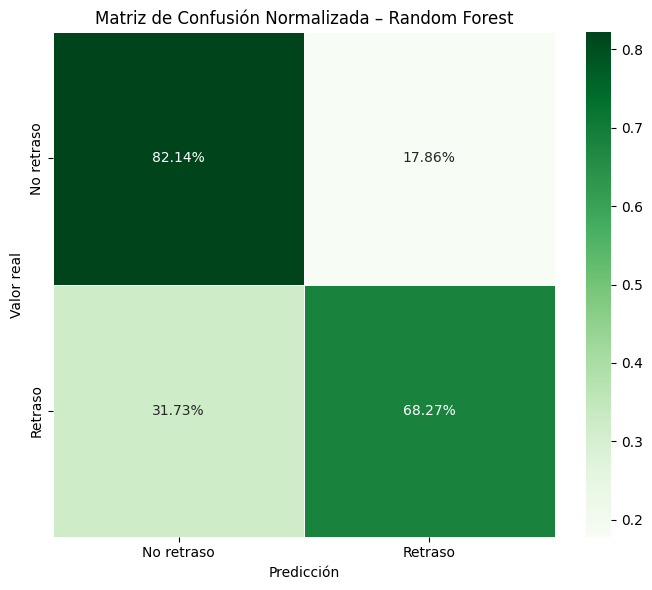

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (ajusta si usas otras)
labels = ['No retraso', 'Retraso']

cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt='.2%',
    cmap='Greens',
    xticklabels=labels,
    yticklabels=labels,
    cbar=True,
    linewidths=0.5
)

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión Normalizada – Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
# Importancia de variables
import pandas as pd

importancias = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

importancias

,Variable,Importancia
11,CRS_DEP_TIME,0.203631
12,CRS_ARR_TIME,0.122757
15,humedad,0.079022
14,temperatura,0.075242
16,presion,0.070914
18,viento_velocidad,0.057351
7,DAY_OF_MONTH,0.055275
13,TAIL_NUM,0.045421
9,ORIGIN_AIRPORT_ID,0.042075
8,OP_UNIQUE_CARRIER,0.039468


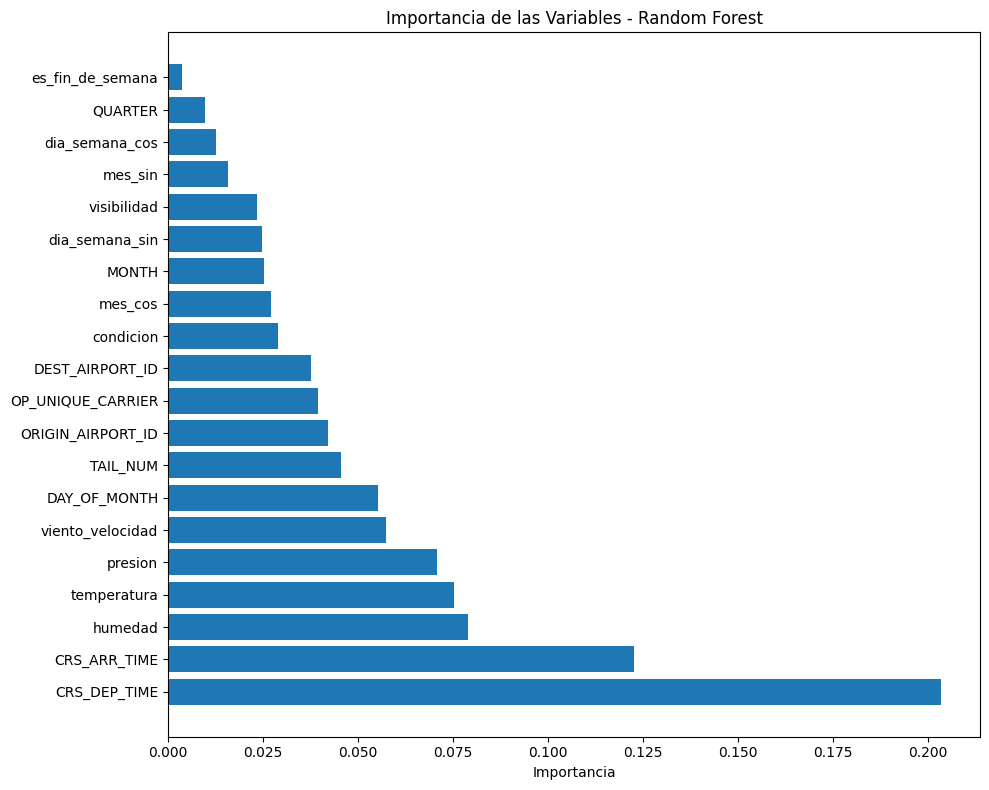

In [ ]:
# Graficar
plt.figure(figsize=(10, 8))
plt.barh(importancias['Variable'], importancias['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de las Variables - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    f1_score
)

In [ ]:
# 1. Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred) #best_rf1

In [ ]:
# 2. Calcular AUC roc_auc = roc_auc_score(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_pred)

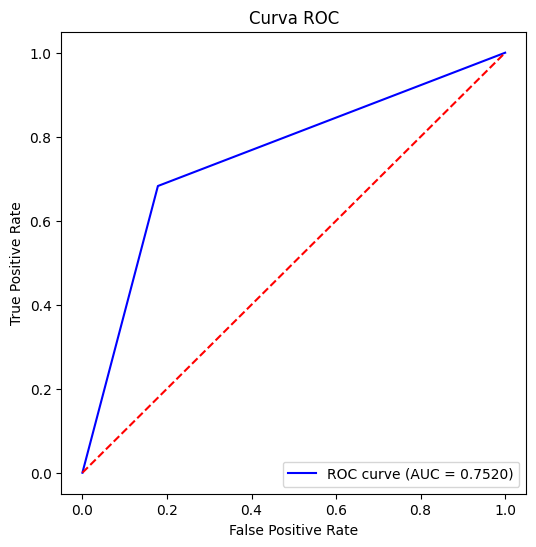

In [ ]:
# 3. Graficar curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # línea aleatoria
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

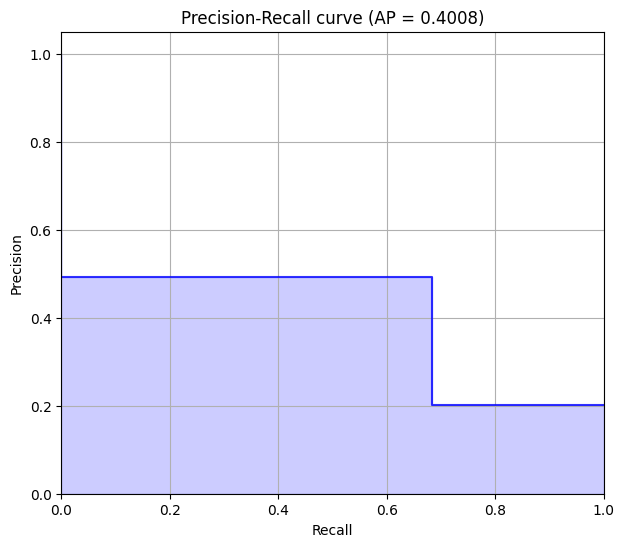

In [ ]:
# Curva Precision Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_true: etiquetas 0/1; y_scores: probabilidades para la clase positiva
# Ejemplo:
# y_true = ...
# y_scores = model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
ap = average_precision_score(y_test, y_pred)

plt.figure(figsize=(7,6))
plt.step(recall, precision, where='post', color='b', alpha=0.8)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AP = {ap:.4f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

### **6.Exportación del Modelo**

In [ ]:
# 6. GUARDADO Y EXPORTACIÓN DEL MODELO
# Guardar artefacto completo
artifact = {
    "model": rf,
    "encoders": encoders,
    "features": features,
    "feature_engineering": feature_engineering
}

print(f"💾 Guardando artefacto: {MODEL_OUTPUT}")
joblib.dump(artifact, MODEL_OUTPUT, compress=3)

# Descarga automática
print("⬇️ Descargando archivo a tu computadora...")
try:
    files.download(MODEL_OUTPUT)
    print("✅ ¡Proceso completado! Entrega el archivo .joblib al desarrollador.")
except Exception as e:
    print(f"⚠️ Error al intentar descargar automáticamente: {e}")
    print(f"   Por favor descarga manualmente el archivo '{MODEL_OUTPUT}' del panel de archivos.")

💾 Guardando artefacto: random_forest_clima.joblib
⬇️ Descargando archivo a tu computadora...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ ¡Proceso completado! Entrega el archivo .joblib al desarrollador.


## **Curva de Calibración (Reliability Curve)**

Esta sección evalúa qué tan confiables son las probabilidades devueltas por el modelo. Una curva de calibración cercana a la diagonal indica que si el modelo predice un 80% de probabilidad de retraso, efectivamente el 80% de esos vuelos se retrasan en la realidad.

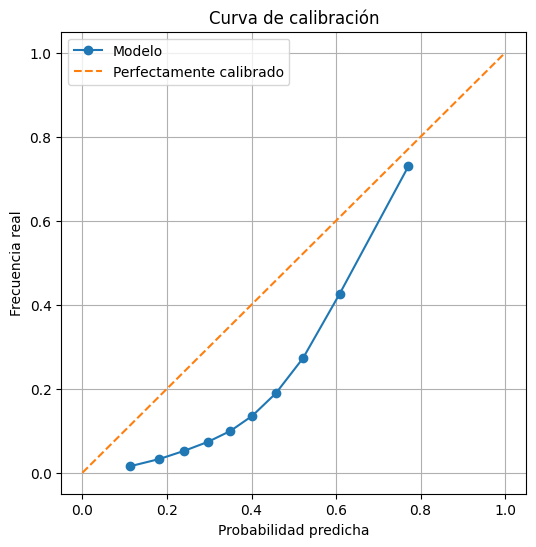

In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(
    y_test,
    y_pred_prob,
    n_bins=10,
    strategy='quantile'
)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label='Modelo')
plt.plot([0,1], [0,1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia real')
plt.title('Curva de calibración')
plt.legend()
plt.grid()
plt.show()


El modelo sobrestima los retrasos.

## **Brier Score (Métrica clave)**

Se debe incluir el cálculo del Brier Score para cuantificar el error cuadrático medio de las probabilidades. Un valor cercano a 0 indica una calibración perfecta, lo cual es vital para que el backend tome decisiones basadas en umbrales de riesgo.

In [ ]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(y_test, y_pred_prob)
print("Brier Score:", brier)


Brier Score: 0.15666641371597495


## **Calibración Explícita del modelo**

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(
    rf,
    method='isotonic',  # o 'sigmoid'
    cv=3
)

calibrated_model.fit(X_train, y_train)

y_prob_cal = calibrated_model.predict_proba(X_test)[:,1]


## **Validar la equidad del modelo (Fairness)**

Se analiza si el modelo presenta sesgos contra grupos específicos. En el contexto de vuelos, se debe verificar que el modelo no tenga un desempeño significativamente inferior para aerolíneas regionales pequeñas o aeropuertos específicos.

## **Análisis Mínimo obligatorio**

### **Métricas por aerolínea**

In [ ]:
df_eval = X_test.copy()
df_eval['y_true'] = y_test.values
df_eval['y_prob'] = y_prob_cal
df_eval['y_pred'] = (y_prob_cal >= 0.5).astype(int)

carrier_metrics = []

for carrier in df_eval['OP_UNIQUE_CARRIER'].unique():
    sub = df_eval[df_eval['OP_UNIQUE_CARRIER'] == carrier]

    if len(sub) < 500:
        continue  # evitar ruido

    carrier_metrics.append({
        'carrier': carrier,
        'count': len(sub),
        'delay_rate_real': sub['y_true'].mean(),
        'delay_rate_pred': sub['y_pred'].mean(),
        'roc_auc': roc_auc_score(sub['y_true'], sub['y_prob'])
    })

carrier_df = pd.DataFrame(carrier_metrics)
carrier_df.sort_values('delay_rate_real')


,carrier,count,delay_rate_real,delay_rate_pred,roc_auc
14,0,14952,0.118446,0.025080,0.811663
13,7,23952,0.131722,0.012233,0.757730
9,14,98530,0.152654,0.063280,0.825830
8,8,85219,0.172755,0.080827,0.788392
0,11,245384,0.179942,0.062441,0.805822
7,4,302636,0.181429,0.087217,0.839480
4,12,233503,0.181732,0.087669,0.839084
11,2,72387,0.200506,0.078053,0.794712
3,9,63828,0.200586,0.098624,0.815708
2,13,412105,0.224790,0.146392,0.821741


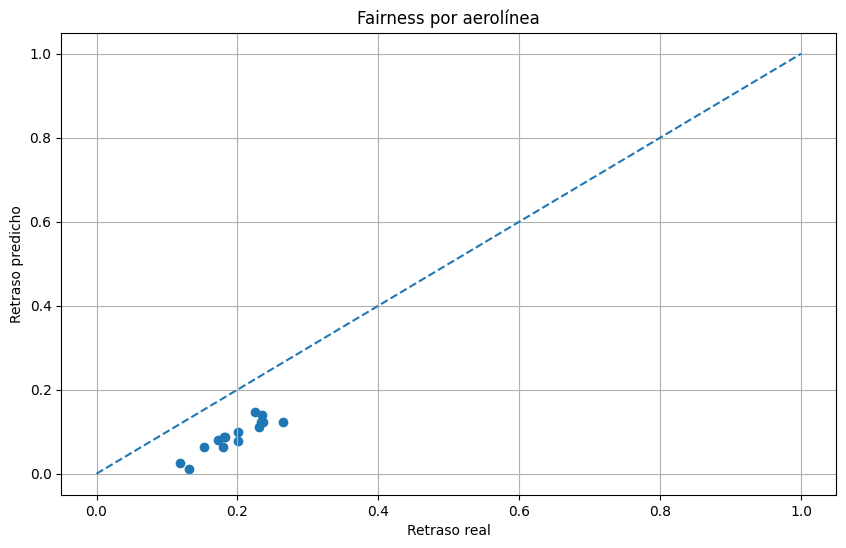

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(
    carrier_df['delay_rate_real'],
    carrier_df['delay_rate_pred']
)

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Retraso real")
plt.ylabel("Retraso predicho")
plt.title("Fairness por aerolínea")
plt.grid()
plt.show()


## **Análisis por error de grupo**

In [ ]:
from sklearn.metrics import recall_score

fairness = []

for carrier in carrier_df['carrier']:
    sub = df_eval[df_eval['OP_UNIQUE_CARRIER'] == carrier]

    fairness.append({
        'carrier': carrier,
        'TPR': recall_score(sub['y_true'], sub['y_pred'])
    })

pd.DataFrame(fairness).sort_values('TPR')


,carrier,TPR
13,7,0.060222
14,0,0.152456
0,11,0.246291
11,2,0.261885
8,8,0.292555
9,14,0.293664
12,6,0.299222
3,9,0.342264
10,5,0.346099
7,4,0.352104
